In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# load dataset
data = pd.read_csv('Customer-survey-data.csv')


print("Initial Data Preview:")
print(data.head())

print("\nData Information:")
print(data.info())


Initial Data Preview:
   Customer  \
0         1   
1         2   
2         3   
3         4   
4         5   

   How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied  \
0                                                5.0                                                                                                          
1                                                3.0                                                                                                          
2                                                4.0                                                                                                          
3                                                5.0                                                                                                          
4                                                2.0                                        

In [2]:
data.dropna(inplace=True)

# lets convert categorical columns to numerical format
data['Was your order accurate? Please respond yes or no.'] = data['Was your order accurate? Please respond yes or no.'].map({'Yes': 1, 'No': 0})

# rename the columns for easier access
data.columns = ['Customer ID', 'Overall Delivery Experience', 'Food Quality', 'Speed of Delivery', 'Order Accuracy']

# check for duplicates and remove any duplicates
data.drop_duplicates(inplace=True)

print("\nCleaned Data Preview:")
print(data.head())



Cleaned Data Preview:
   Customer ID  Overall Delivery Experience  Food Quality  Speed of Delivery  \
0            1                          5.0           3.0                4.0   
1            2                          3.0           4.0                3.0   
2            3                          4.0           5.0                2.0   
3            4                          5.0           3.0                4.0   
4            5                          2.0           5.0                1.0   

   Order Accuracy  
0               1  
1               1  
2               1  
3               1  
4               1  


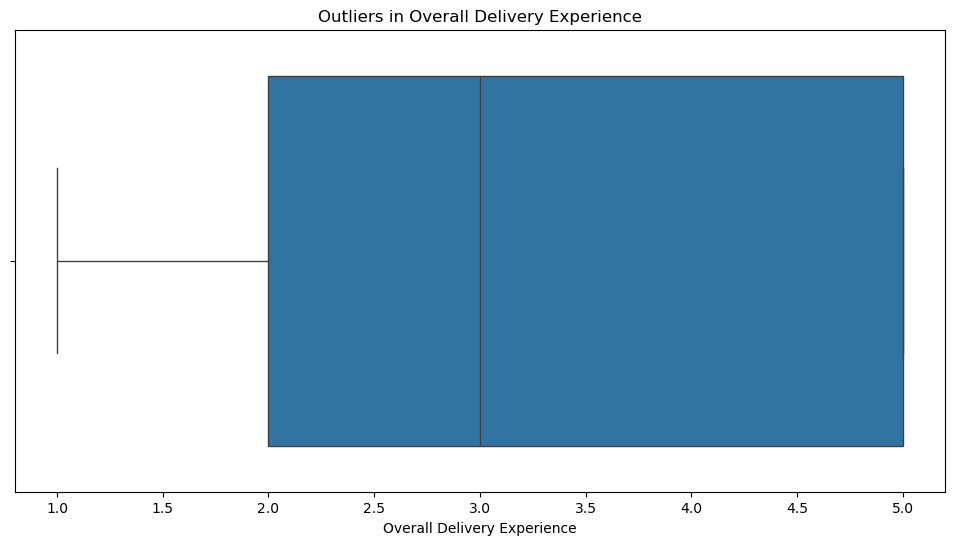

In [3]:
def plot_outliers(data, column):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Outliers in {column}')
    plt.show()
plot_outliers(data, 'Overall Delivery Experience')

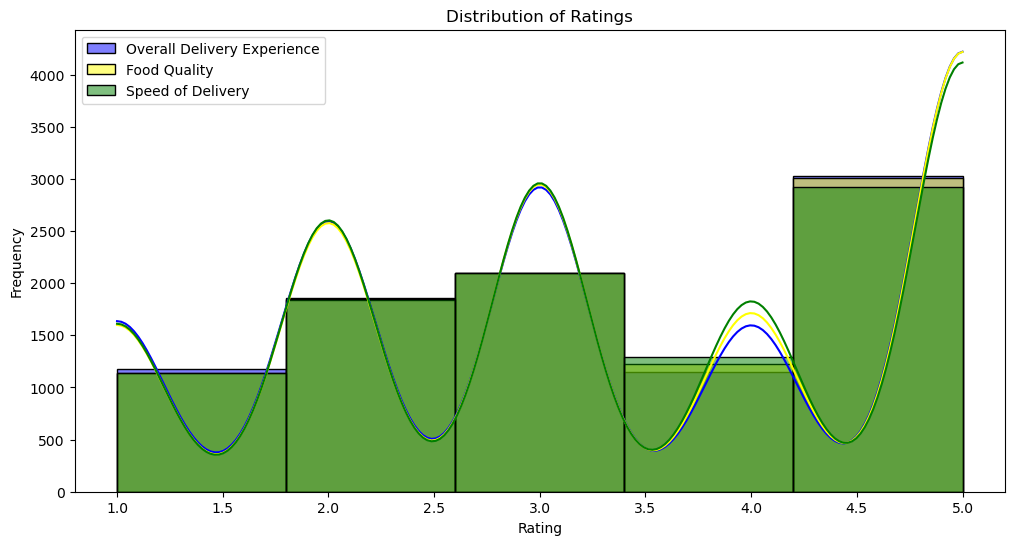

In [4]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Overall Delivery Experience'], bins=5, kde=True, label='Overall Delivery Experience', color='blue')
sns.histplot(data['Food Quality'], bins=5, kde=True, label='Food Quality', color='yellow')
sns.histplot(data['Speed of Delivery'], bins=5, kde=True, label='Speed of Delivery', color='green')
plt.legend()
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


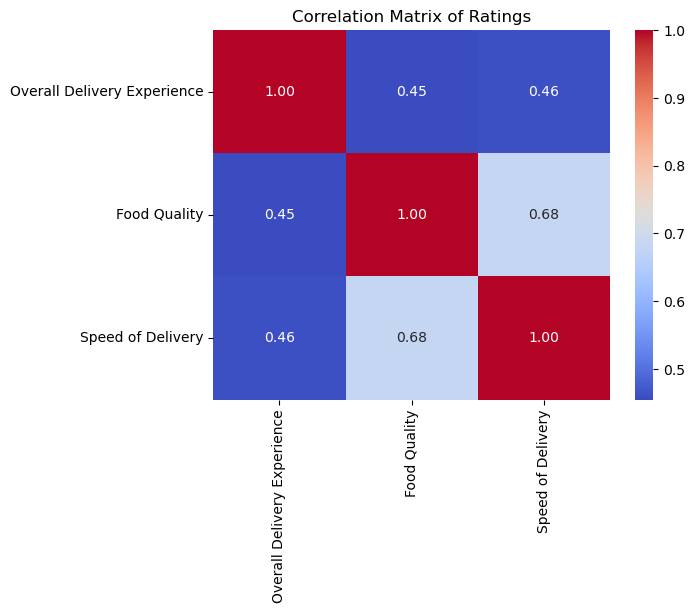

In [5]:
correlation_matrix = data[['Overall Delivery Experience', 'Food Quality', 'Speed of Delivery']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Ratings')
plt.show()

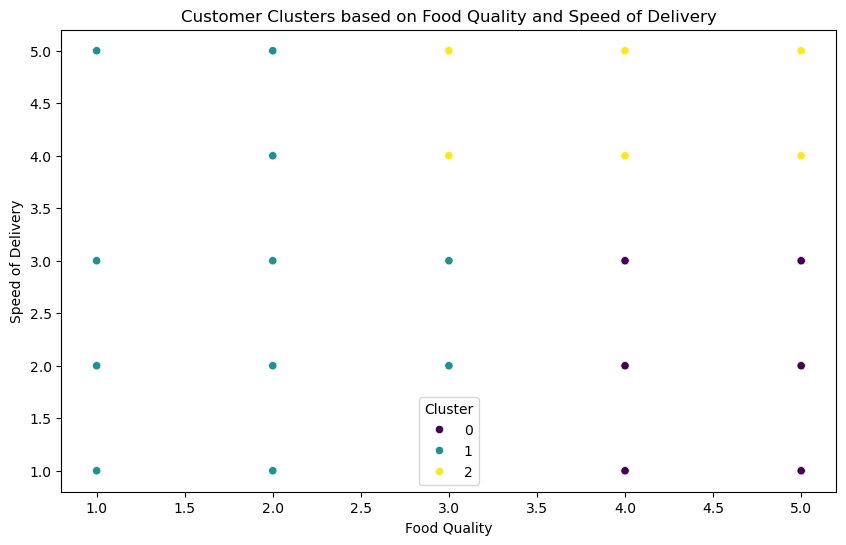

In [6]:
# Prepare data for clustering
features = data[['Food Quality', 'Speed of Delivery']]
kmeans = KMeans(n_clusters=3, random_state=42)  # Example: 3 clusters
data['Cluster'] = kmeans.fit_predict(features)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Food Quality', y='Speed of Delivery', hue='Cluster', palette='viridis')
plt.title('Customer Clusters based on Food Quality and Speed of Delivery')
plt.xlabel('Food Quality')
plt.ylabel('Speed of Delivery')
plt.legend(title='Cluster')
plt.show()

In [7]:
# calculate average ratings
average_ratings = data[['Overall Delivery Experience', 'Food Quality', 'Speed of Delivery']].mean()
print(average_ratings)

# using group by order Accuracy and calculate mean ratings
accuracy_analysis = data.groupby('Order Accuracy').mean()
print(accuracy_analysis)


Overall Delivery Experience    3.321609
Food Quality                   3.335054
Speed of Delivery              3.322792
dtype: float64
                Customer ID  Overall Delivery Experience  Food Quality  \
Order Accuracy                                                           
0               6630.186792                     3.290943      3.345660   
1               4814.664209                     3.333835      3.330826   

                Speed of Delivery   Cluster  
Order Accuracy                               
0                        3.290189  1.334340  
1                        3.335791  1.327667  


Accuracy: 0.6559139784946236
              precision    recall  f1-score   support

         1.0       0.69      0.58      0.63       347
         2.0       0.63      0.61      0.62       585
         3.0       0.63      0.69      0.66       604
         4.0       0.58      0.59      0.58       349
         5.0       0.71      0.72      0.71       905

    accuracy                           0.66      2790
   macro avg       0.65      0.64      0.64      2790
weighted avg       0.66      0.66      0.66      2790



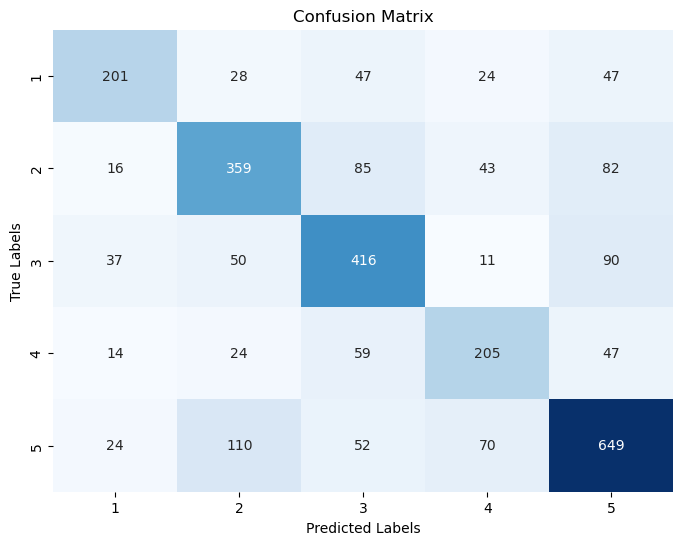

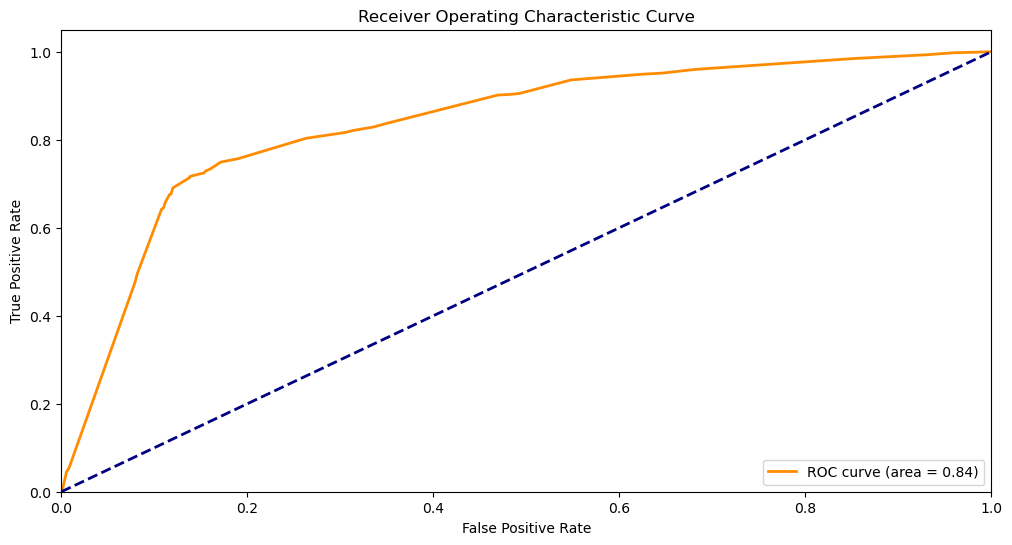

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# set features and target
X = data[['Food Quality', 'Speed of Delivery', 'Order Accuracy']]
y = data['Overall Delivery Experience']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# set and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# get predicted probabilities
y_scores = model.predict_proba(X_test)[:, 4]  # Assuming 5 is the class of interest (0-based index)

# evaluate model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['1', '2', '3', '4', '5'], yticklabels=['1', '2', '3', '4', '5'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# plot ROC curve
def plot_roc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores, pos_label=5)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(12, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc='lower right')
    plt.show()

plot_confusion_matrix(y_test, y_pred)
plot_roc_curve(y_test, y_scores)


Food Quality: 0.5136
Speed of Delivery: 0.4825
Order Accuracy: 0.0039


C:\Users\User\AppData\Local\Temp\ipykernel_20752\1755469137.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


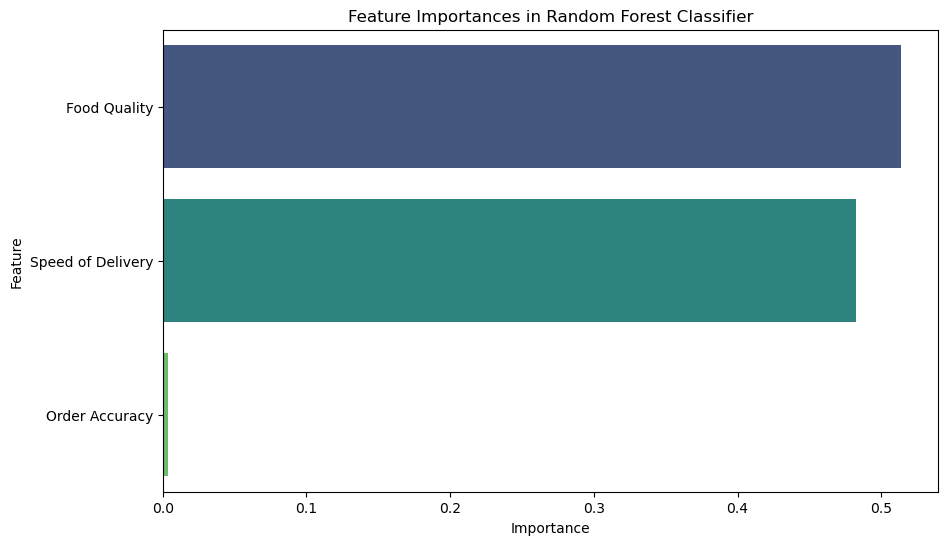

In [9]:
importances = model.feature_importances_
features = X.columns
for feature, importance in zip(features, importances):
    print(f'{feature}: {importance:.4f}')
    

feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# sort the df by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# now plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances in Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
